![imagen](./img/ejercicios.png)

# INFORMACIÓN DEL PROYECTO

### TÍTULO

In [ ]:
#Escribe el título del proyecto en Markdown
titulo = "Artistas o grupos musicales con más exitos en Billboard Hot 100"
URL="https://en.wikipedia.org/wiki/Billboard_Hot_100"
introduction=' The first number-one song of the Billboard Hot 100 was "Poor Little Fool" by Ricky Nelson, on  started on August 4th 1958 As of the issue for the week ending on December 30th 2023, the Billboard Hot 100 has had 1,161 different number-one entries. The current number-one song on the chart is "All I Want for Christmas Is You" by Mariah Carey.[6]"'

edades de los artistas o grupos top

univariante
decidir que hacer con los géneros
columna por género
    

### TEMA

In [ ]:
# Describe brevemente el tema del proyecto en Markdown
tema = "Exitos musicales en la lista Billboard Hot 100 desde 1966"

### HIPÓTESIS

Define aquí lo que será la hipótesis de tu proyecto.
Deberás tener más de una, pero tu proyecto lo harás teniendo una principal hipótesis.

In [ ]:
# Escribe tu hipótesis principal en Markdown
hipotesis_1 = "Qué grupo o artista es el que más éxitos ha tenido desde 1966"

In [ ]:
# Escribe más hipótesis si las hubiera en Markdown
hipotesis_2 = "Que grupo o artista llevan más años en las listas más tiempo y de que generos"
hipotesis_3 = "Que grupo o artista llevan más exitos en los ultimos 10 años y de que generos"
hipotesis_4 = "Qué grupo o artista han sido 1 hit wonder y de que generos"
hipotesis_5 = "Qué generos corresponden a cada grupo o artista anterior"

# ...


## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

Incluye aquí una vista del dataset o datasets de los que partirás para poder evaluar tu hipótesis. <br>
También incluye el origen de estos datos y su fuente.

In [86]:
import ast
import json
import numpy as np
import os
import pandas as pd
from bootcampviztools import *
#from bootcampviztools2 import *
from edafunctions import *


# guarda en variables los datasets y su fuente
df_Hot_100_Audio_Features = pd.read_csv("./data/Hot_100_Audio_Features.csv").set_index('index')#con género unknown
#df_Hot_100_Audio_Features_original = pd.read_csv("./data/Hot_100_Audio_Features_original.csv").set_index('index')#sin género unknown
#df_compare= df_Hot_100_Audio_Features.compare(df_Hot_100_Audio_Features_original)
#limpio duplicados
df_Hot_100_Audio_Features_backup_20240103 = df_Hot_100_Audio_Features.copy()
df_Hot_100_Audio_Features.drop_duplicates(inplace=True)
df_Hot_Stuff = pd.read_csv("./data/Hot_Stuff.csv").set_index('index')
df_genres_modificado = pd.read_csv("./data/df_genres_20231228_2104_without_column_unknown.csv",sep=";").set_index("index")
fuente_1 = "https://www.kaggle.com/datasets/thedevastator/billboard-hot-100-audio-features"
#convierto en otra columna los géneros en una lista 
df_Hot_100_Audio_Features_backup = df_Hot_100_Audio_Features.copy()
#los vacíos son ahora del género unknown 
df_Hot_100_Audio_Features.spotify_genre.fillna("['unknown']",inplace=True)
#los nan de deanceability son ahora 0
df_Hot_100_Audio_Features.danceability.fillna(0,inplace=True)
#con este instrucción creo la columna género adicional como lista 
df_Hot_100_Audio_Features["spotify_genre_list"] = df_Hot_100_Audio_Features.spotify_genre.apply(ast.literal_eval)
#reemplazo los espacios en los nombres por un guión bajo para poder referenciarlos correctamente cuando sea el nombre de una columna
value_to_find='unknown'
df_Hot_100_Audio_Features.drop(df_Hot_100_Audio_Features[df_Hot_100_Audio_Features['spotify_genre_list'].apply(lambda x: value_to_find in x)].index,inplace=True)
df_Hot_100_Audio_Features
#for indice, valor in enumerate(df_Hot_100_Audio_Features.spotify_genre_list):
    #print(f"indice:{indice} con valor:{valor}")
    #lista_temporal=[]
    #if len(valor)>1:
    #    
    #    for elemento in valor:
    #        elemento = elemento.replace(" ","_")
    #        lista_temporal.append(elemento)
    #else:
    #   lista_temporal.append(elemento)
    #df_Hot_100_Audio_Features.spotify_genre_list.at[indice] = lista_temporal

df_Hot_100_Audio_Features.spotify_genre_list = df_Hot_100_Audio_Features.spotify_genre_list.apply(lambda x: [item.replace(" ", "_") for item in x])
df_Hot_100_Audio_Features['spotify_genre_list_no_dups'] = df_Hot_100_Audio_Features.spotify_genre_list.apply(set)
df_Hot_100_Audio_Features['spotify_genre_list_no_dups'] = df_Hot_100_Audio_Features.spotify_genre_list.apply(list)
df_Hot_100_Audio_Features.danceability.fillna(0,inplace=True)
df_Hot_100_Audio_Features_genres_EDA=df_Hot_100_Audio_Features.copy()
df_Hot_Stuff_with_genres = pd.merge(df_Hot_100_Audio_Features_genres_EDA, df_Hot_Stuff, on='SongID', how='inner')
df_Hot_Stuff_with_genres["WeekID_As_Date"] = pd.to_datetime(df_Hot_Stuff_with_genres.WeekID)

In [87]:
#creo un diccionario para crear las columnnas del dataset de generos
list_with_all_genres =[]
for valor in df_Hot_100_Audio_Features.spotify_genre_list_no_dups:
    #print(type(valor))
    if len(valor)==1:
        if valor[0] not in list_with_all_genres:
            list_with_all_genres.append(valor[0])
    elif len(valor)>1:
        i=0
        for i in range(len(valor)):
            if valor[i] not in list_with_all_genres:
                list_with_all_genres.append(valor[i])
print(f"Longitud de todos los géneros:{len(list_with_all_genres)}")
dict_with_all_genres={}
#estoy aquí 2024/01/07 19:02
for valor in list_with_all_genres:
        for row_spotify_genre_list_no_dups in df_Hot_100_Audio_Features.spotify_genre_list_no_dups:
            if valor in row_spotify_genre_list_no_dups:
                if valor in dict_with_all_genres.keys():
                    dict_with_all_genres[valor]=dict_with_all_genres[valor]+1
                else:
                    dict_with_all_genres[valor]=1
    #print("valor:",valor," ocurrences:",count_occurrences)
top_50_entries = dict(sorted(dict_with_all_genres.items(), key=lambda item: item[1], reverse=True)[:50])
list_top_50_entries=list(top_50_entries.keys())
valor_de_corte = list(top_50_entries.values())[-1]
df_genres = df_Hot_100_Audio_Features[['SongID','spotify_genre_list_no_dups']].copy()
for value in list_top_50_entries:
    df_genres[value]=False


#dict_with_all_genres = sorted_dict
#df_genres = populate_with_mutlpile_boolean_columns(df_Hot_100_Audio_Features,list_top_50_entries)
#df_genres['SongID'] = None
#df_genres['spotify_genre_list_no_dups'] = None
#estoy aquí 2024/01/07 21:21
#pongo a True
for index,row in df_Hot_100_Audio_Features.iterrows():
    for value in row['spotify_genre_list_no_dups']:
        if value in list_top_50_entries:
            df_genres.at[index, value] = True
#elimino los que tienen todo a False
acumulador_false=0
indices=[]
for index,row in df_genres.iterrows():
    for column in list_top_50_entries:
        if row[column]==False:
            acumulador_false=acumulador_false+1
    #print(f"index:{index} acumulador_false:{acumulador_false}")
    if acumulador_false==50:
            indices.append(index)
    acumulador_false=0
df_genres_backup = df_genres.copy()
df_genres.drop(indices,inplace=True)

Longitud de todos los géneros:1145


In [88]:
df_genres

,SongID,spotify_genre_list_no_dups,mellow_gold,soft_rock,adult_standards,brill_building_pop,rock,dance_pop,pop,soul,...,dance_rock,new_jack_swing,merseybeat,classic_uk_pop,easy_listening,doo-wop,psychedelic_rock,gangster_rap,roots_rock,blues_rock
index,,,,,,,,,,,,,,,,,,,,,
2,......And Roses And RosesAndy Williams,"[adult_standards, brill_building_pop, easy_lis...",True,False,True,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,...And Then There Were DrumsSandy Nelson,"[rock-and-roll, space_age_pop, surf_music]",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,...Baby One More TimeBritney Spears,"[dance_pop, pop, post-teen_pop]",False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
5,...Ready For It?Taylor Swift,"[pop, post-teen_pop]",False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,"[east_coast_hip_hop, hip_hop, pop_rap, rap, so...",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29493,Zing Went The Strings Of My HeartThe Trammps,"[disco, motown, philly_soul, post-disco]",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29495,Zip CodeThe Five Americans,"[bubblegum_pop, classic_garage_rock, freakbeat]",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29496,Zip-A-Dee Doo-DahBob B. Soxx And The Blue Jeans,[brill_building_pop],False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [101]:
#acumulo por género y rango de fechas empezando por el 1 de Enero de la fecha más antigua en grupos de 5 años
filtered=df_Hot_Stuff_with_genres[df_Hot_Stuff_with_genres['Previous Week Position'].isna()]
filtered=filtered.sort_values(by='WeekID_As_Date').head(1).copy()
initial_date = filtered['WeekID_As_Date'].values[0]
year = pd.to_datetime(initial_date).year
year=str(year)
full_initial_date=pd.to_datetime(year+"/01/01")
full_initial_date
#fecha de inicio
#filtro por rango de fechas 5 años filtered
    #cuento cuantos géneros están a True
    #guardo el .csv con fecha inicio y fecha fin del bucle

#estoy aquí 2024/01/08 12_25


Timestamp('1958-01-01 00:00:00')

In [ ]:
filtered=df_Hot_Stuff_with_genres[df_Hot_Stuff_with_genres['Previous Week Position'].isna()][['Performer_x','Song_y','WeekID_As_Date','spotify_genre_list_no_dups']]
filtered=filtered.sort_values(by='WeekID_As_Date').head(1).copy()
filtered['WeekID_As_Date'].values[0]



In [ ]:

df_genres['WeekID_As_Date']=pd.to_datetime(filtered['WeekID_As_Date'].year+"01/01")
df_genres_update = df_genres.copy()
multi_index=[]
loop=0
por_revisar=[]
df_genres_update

In [ ]:
for index,row in df_genres.iterrows():
    SongID=row['SongID']
    condition_1 = df_Hot_Stuff_with_genres[df_Hot_Stuff_with_genres['Previous Week Position'].isna()]

    first_date= condition_1[df_Hot_Stuff_with_genres['SongID']==SongID]['WeekID_As_Date'].sort_values()
    first_date=first_date.head(1).copy()
    
    
    if len(first_date)>0:
        print("entro")
        print("first_date:",first_date," shape:",first_date.size," first_date[1]:",first_date.iloc[0])
    else:
        por_revisar.append(index)
        #df_genres_update.at[index, 'WeekID_As_Date'] = first_date[1] 
    
    #print("first_date:",first_date)

In [ ]:
df_Hot_Stuff_with_genres.iloc[por_revisar]

In [ ]:
#contador por 5 años
df_genres_join_df_Hot_Stuff_with_genres = pd.merge(df_genres, df_Hot_Stuff_with_genres, on='SongID', how='inner')
#condition_1=df_genres_join_df_Hot_Stuff_with_genres['WeekID_As_Date'] >= pd.to_datetime('1963/01/01')
#condition_2=df_genres_join_df_Hot_Stuff_with_genres['WeekID_As_Date'] < pd.to_datetime('1968/01/01')
#condition_2=0
#df_genres_join_df_Hot_Stuff_with_genres[df_genres_join_df_Hot_Stuff_with_genres[(condition_1) & (condition_2)]]
df_genres_join_df_Hot_Stuff_with_genres.groupby(["SongID","WeekID_As_Date"]).WeekID_As_Date.count()

In [ ]:

#filtered[filtered['Performer_x']=='Mariah Carey']

In [ ]:
df_danceability_row_data = {
                    'SongID': SongID,
                    'spotify_genre_as_list': spotify_genre_as_list_value,
                    'spotify_genre_scatter': value_to_find,
                    'spotify_genre_count': row['Count'],
                    'danceability': danceability_value * 100,
                    'start_date': row["start_date"], 
                    'end_date': row["end_date"]
                                            }
                    print("df_danceability_row_data:",df_danceability_row_data,sep="\r\n\t")
                    danceability_list.append(df_danceability_row_data)

In [ ]:
df_genres

In [ ]:
df_Hot_100_Audio_Features.SongID.isna().value_counts()

In [ ]:
populate_with_mutlpile_boolean_columns(df_Hot_100_Audio_Features,list_with_all_genres)


In [ ]:
lista=['spotify_genre_list_no_dups']
column_name='Genre'
#totals_of_a_string_column(df_Hot_100_Audio_Features,lista,'Genre')
pandas_df_counts = df_Hot_100_Audio_Features[lista].value_counts().reset_index()
pandas_df_counts.columns = [column_name, 'Count']

In [ ]:
df_genres_modificado

In [ ]:
df_Hot_100_Audio_Features

https://www.kaggle.com/datasets/thedevastator/billboard-hot-100-audio-features

The Billboard Hot 100 Weekly Charts with Audio dataset is a comprehensive collection that combines the historical data of the Billboard Hot 100 weekly singles charts with detailed audio features extracted from Spotify. The dataset provides valuable insights into the popularity and musical attributes of songs that have appeared on the Billboard charts.

The primary dataset, Hot Stuff.csv, includes information about each song's position on the weekly charts. It contains columns such as the Billboard Chart URL, WeekID, Song name, Performer name, unique SongID (concatenation of song and performer), Current week on chart, Instance (indicating breaks in chart appearances), Previous week position, Peak Position (highest chart position reached), and Weeks on Chart.

The second dataset, Hot 100 Audio Features.csv, provides in-depth audio features of each song sourced from Spotify's Web API. This includes various metrics such as danceability (suitability for dancing based on musical elements), energy level (intensity and activity), key (musical key signature), loudness (overall volume level in decibels dB), mode (major or minor key), speechiness rating (presence of spoken words in songs), acousticness rating (acoustic quality measure), instrumentalness rating (likelihood of a song being instrumental), liveness rating (presence of a live audience during recording/performance) valence rating(musical positiveness conveyed by a song). Additionally it provides tempo in BPM and time signature(e.g., 4/4 -the rhythm pattern).

Furthermore , this comprehensive dataset encompasses Spotify-related features: track preview URL for audio samples before full streaming or purchase decisions; total duration measured in milliseconds; explicit content indication; album details for songs; genre details provided by Spotify.

With this combined data set, researchers can analyze trends and patterns over time regarding how different audio features relate to a song's popularity and performance on the Billboard Hot 100. It offers endless possibilities for studying the influence of specific music attributes on commercial success and understanding the preferences of popular music audiences.

Whether you are interested in exploring genre-based trends, discovering correlations between chart positions and audio features, or investigating how certain attributes contribute to a song's longevity on the charts, this dataset serves as a valuable resource for deep analysis and insights into Billboard Hot 100 songs

Understanding the Datasets:
<pre>
The dataset consists of two files: Hot Stuff.csv and Hot 100 Audio Features.csv.
The Hot Stuff.csv file contains the weekly Hot 100 singles chart data, including song names, performer names, chart positions, 
and other relevant information.
The Hot 100 Audio Features.csv file contains detailed audio features for each song extracted from Spotify, such as danceability, 
energy, instrumentalness, etc.
Both files can be merged using common attributes like Performer and Song to get a combined view of both datasets.
Exploring the Hot Stuff.csv File:
</pre>
<pre>
This file provides information about each song's position on that week's Hot 100 singles chart.
Important columns in this file are:

    WeekID: The week identifier.
    Song name: The name of the song.
    Performer name: The name of the performer or artist.
    Current week on chart: Represents how many weeks the song has been on the chart at that particular point in time.
    Instance: Indicates whether it is a separate entry for an already listed song (for example, an instance value of 6 means it 
            appeared for the sixth time).
    Previous week position: The position of the song on the previous week's chart.
    Peak Position: The highest position reached by a particular song on any given week's chart.
    Weeks on Chart: Represents how many weeks a specific entry has spent on the chart so far.
    
Exploring the Hot 100 Audio Features.csv File:
</pre>
<pre>
This file provides detailed audio features for each song extracted from Spotify using the Spotify Web API.
It contains attributes like danceability, energy, instrumentalness, tempo, etc., which help capture different aspects of the song's musical characteristics.
Important columns in this file are:

    Performer: The name of the performer or artist of the song.
    Song: The name of the song.
    spotify_genre: The genre(s) of the song according to Spotify.
    spotify_track_duration_ms: The duration
</pre>

<pre>
Predicting the popularity of a song: 
    By analyzing the audio features such as danceability, energy, valence, and tempo, this dataset can be used to develop models that 
    predict the popularity of a song on the Billboard Hot 100 chart.
Genre analysis: 
    With the spotify_genre column providing information about the genre(s) of each song according to Spotify, this dataset can be 
    utilized to analyze trends in popular genres over time and identify patterns in genre preferences among listeners.
Impact of explicit content on chart performance: 
    By examining the spotify_track_explicit column and comparing it with other variables like peak position and weeks on chart, this 
    dataset can be used to explore whether songs with explicit content are more or less likely to achieve high positions on the 
    Billboard Hot 100 chart
</pre>

If you use this dataset in your research, please credit the original authors.

Data Source

https://www.kaggle.com/datasets/thedevastator/billboard-hot-100-audio-features#:~:text=the%20original%20authors.-,Data%20Source,-License

You are free to:
Share - copy and redistribute the material in any medium or format for any purpose, even commercially.
Adapt - remix, transform, and build upon the material for any purpose, even commercially.
You must:
Give appropriate credit - Provide a link to the license, and indicate if changes were made.
ShareAlike - You must distribute your contributions under the same license as the original.
Keep intact - all notices that refer to this license, including copyright notices.

In [ ]:
df_Hot_Stuff.describe

Muestra mediante un head() los principales datasets con los que vas a trabajar

In [ ]:
# Primer dataset
df_Hot_100_Audio_Features.head(50)
#columnas por género en otro df
    #univariante  con cantantes por éxito
#bivariante con los géneros con más canciones
#duración media de la canción
#heatmap tabla contingencia de los géneros
    #en los colores 
#buscar librería counter


In [ ]:
df_Hot_100_Audio_Features.head(50)


In [ ]:
df_Hot_Stuff.head(50)


In [ ]:
df_Hot_100_Audio_Features.spotify_genre.head(25)
#transformar lista en columnas


In [ ]:
#innecesario si se ha cargado el CSV al principio
#df_result = pd.merge(df_Hot_100_Audio_Features, df_Hot_Stuff, how="inner", on=["Song", "SongID"])

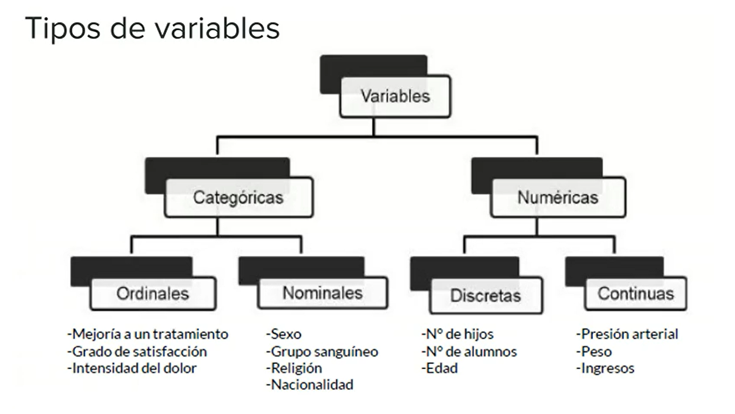

<PRE>
Variables in explanatory data analysis can be classified into different types based on their nature and the kind 
of data they represent. 
The main types of variables are:

1. Categorical Variables:

    Nominal: Qualitative data without any inherent order or ranking (e.g., gender, colors, musical genres).
    
    Ordinal: Qualitative data with a specific order or ranking (e.g., ratings - low, medium, high).

2. Numerical Variables:
    
    Discrete: Quantitative data that take on a countable set of values (e.g., counts, whole numbers).
    
    Continuous: Quantitative data that can take any value within a given range (e.g., height, weight).

3. Time-related Variables:

    Interval: Time or numerical data where the difference between values is consistent, but there's no true zero point 
              (e.g., temperature in Celsius or Fahrenheit).
    
    Ratio: Time or numerical data with a true zero point, where ratios and proportions make sense (e.g., age, income).

4. Derived Variables:
    
    Composite or Derived: Variables created from the original data through calculations or transformations 
                          (e.g., percentages, averages, ratios).

5. Univariate vs. Multivariate Variables:
    
    Univariate: Variables analyzed individually to understand their distributions and characteristics.

    Multivariate: Analysis involving relationships between multiple variables simultaneously (e.g., correlations, regressions).
    
    Understanding the types of variables helps in choosing appropriate statistical techniques and visualization methods during 
    data exploration. 
    For instance,  different visualizations (e.g., histograms, bar plots, box plots) are suitable for different 
    variable types, aiding in better interpretation and analysis.

During an explanatory data analysis, identifying and appropriately handling these variable types are crucial 
for uncovering patterns, relationships, and insights within the data.
<PRE>

**Dataset:**  Hot_Stuff.csv  

**Descripción:** This file provides information about each song's position on that week's Hot 100 singles chart

**Periodo:**  From 01/01/1963 to 31/12/2023

<h1>df_Hot_Stuff</h1>
<table>
<tr><th>Columna/Variable</th><th>Descripción</th><th>Tipo de Variable</th><th>Importancia inicial</th><th>Nota</th></tr>
<tr><td>url</td><td>URL of the song</td><td>string</td><td>1</td><td></td></tr>
<tr><td>WeekID</td><td>Date of the song</td><td>string</td><td>2</td><td></td></tr>
<tr><td>Week Position</td><td>Position on the chart </td><td>string</td><td>2</td><td></td></tr>
<tr><td>Song</td><td>Title of the song</td><td>string</td><td>0</td><td></td></tr>
<tr><td>Performer</td><td>Artist or band that performs the song</td><td>string</td><td>0</td><td></td></tr>
<tr><td>SongID</td><td>ID of the row</td><td>Indice</td><td>2</td><td></td></tr>
<tr><td>Instance</td><td>Indicates whether it is a separate entry for an already listed song (for example, an instance value of 6 means it 
            appeared for the sixth time).</td><td>string</td><td>2</td><td></td></tr>
<tr><td>Previous Week Position</td><td>URL of the song</td><td>string</td><td>0</td><td></td></tr>
<tr><td>Peak Position</td><td>The highest position reached by a particular song on any given week's chart</td><td>string</td><td>0</td><td></td></tr>
<tr><td>Weeks on Chart</td><td>Represents how many weeks a specific entry has spent on the chart so far</td><td>string</td><td>2</td><td></td></tr>
</table>

 <pre>
 WeekID: The week identifier.
 Song name: The name of the song.
 Performer name: The name of the performer or artist.
 Current week on chart: Represents how many weeks the song has been on the chart at that particular point in time.
 Instance: Indicates whether it is a separate entry for an already listed song (for example, an instance value of 6 means it 
           appeared for the sixth time).
 Previous week position: The position of the song on the previous week's chart.
 Peak Position: The highest position reached by a particular song on any given week's chart.
 Weeks on Chart: Represents how many weeks a specific entry has spent on the chart so far.
</pre>

**Dataset:**  df_genres_20231228_2104_without_column_unknown.csv

**Descripción:** Listado con songID y los 50 géneros musicales de Spotify a True or False

**Periodo:**  De 01/01/1963 a 31/12/2013

<h1>df_genres_modificado</h1>
<table>
<tr><th>Columna/Variable</th><th>Descripción</th><th>Tipo de Variable</th><th>Importancia inicial</th><th>Nota</th></tr>
<tr><td>SongID</td><td>ID of the row</td><td>Indice</td><td>2</td><td></td></tr>
<tr><td>Multiple names of genres</td><td>False or True depending of the genre that is on the next column</td><td>Binaria</td><td>0</td><td></td></tr>
<tr><td>spotify_genre_list</td><td>List of genres of the song</td><td>Categórica nominal</td><td>2</td><td></td></tr>
</table>

**Dataset:**  Hot_100_Audio_Features.csv  
**Descripción:** This file provides detailed audio features for each song extracted from Spotify using the Spotify Web API.  
**Periodo:**  From 01/01/1963 to 31/12/2023 

<h1>df_Hot_100_Audio_Features</h1>
<table>
<tr><th>Columna/Variable</th><th>Descripción</th><th>Tipo de Variable</th><th>Importancia inicial</th><th>Nota</th></tr>
<tr><td>SongID</td><td>ID of the row</td><td>Indice</td><td>2</td><td></td></tr>
<tr><td>Performer</td><td>Artist or band that performs the song</td><td>Categórica nominal</td><td>0</td><td></td></tr>
<tr><td>Song</td><td>Name of the song</td><td>Categórica</td><td>1</td><td></td></tr>
<tr><td>spotify_genre</td><td>genre according to Spotify</td><td>Categórica</td><td>1</td><td></td></tr>
<tr><td>spotify_track_id</td><td>ID of the track on Spotify</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>spotify_track_preview_url</td><td>URL of the song at Spotify</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>spotify_track_duration_ms</td><td>Duration in ms of the song</td><td>Categórica</td><td>0</td><td></td></tr>
<tr><td>spotify_track_explicit</td><td>Unknown</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>spotify_track_album</td><td>URL of the song</td><td>Categórica</td><td>0</td><td></td></tr>
<tr><td>danceability</td><td>describing how suitable a track is for dancing based on a combination of musical elements, including tempo, rhythm stability, beat strength, and overall regularity.</td><td>Numérica continua</td><td>1</td><td></td></tr>
<tr><td>energy</td><td>representing "a perceptual measure of intensity and activity", based on the track's dynamic range, perceived loudness, timbre, onset rate, and general entropy</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>key</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>loudness</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>mode</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>speechiness</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>acousticness</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>instrumentalness</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>liveness</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>valence</td><td>describing "the musical positiveness of the track". Generally speaking, tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while songs with low valence sound more negative (e.g., sad, depressed, angry)</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>tempo</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>time_signature</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>spotify_track_popularity</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
</table>

<pre>
SongID
Performer
Song
spotify_genre
spotify_track_id
spotify_track_preview_url
spotify_track_duration_ms
spotify_track_explicit
spotify_track_album
danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo
time_signature
spotify_track_popularity
</pre>

In [ ]:
df_tipificacion_df_Hot_Stuff = pd.DataFrame([df_Hot_Stuff.nunique(), df_Hot_Stuff.nunique()/len(df_Hot_Stuff) * 100, df_Hot_Stuff.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion_df_Hot_Stuff["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion_df_Hot_Stuff.loc[df_tipificacion_df_Hot_Stuff.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion_df_Hot_Stuff.loc[df_tipificacion_df_Hot_Stuff["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion_df_Hot_Stuff.loc[df_tipificacion_df_Hot_Stuff["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion_df_Hot_Stuff

In [ ]:

df_tipificacion_df_Hot_100_Audio_Features_genres_EDA = pd.DataFrame([df_Hot_100_Audio_Features_genres_EDA.nunique(), df_Hot_100_Audio_Features_genres_EDA.nunique()/len(df_Hot_100_Audio_Features_genres_EDA) * 100, df_Hot_100_Audio_Features_genres_EDA.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA.loc[df_tipificacion_df_Hot_100_Audio_Features_genres_EDA.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA.loc[df_tipificacion_df_Hot_100_Audio_Features_genres_EDA["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA.loc[df_tipificacion_df_Hot_100_Audio_Features_genres_EDA["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA

In [ ]:
df_tipificacion_df_Hot_Audio_Features= pd.DataFrame([df_Hot_100_Audio_Features.nunique(), df_Hot_100_Audio_Features.nunique()/len(df_Hot_100_Audio_Features) * 100, df_Hot_100_Audio_Features.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion_df_Hot_Audio_Features
df_tipificacion_df_Hot_Audio_Features["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion_df_Hot_Audio_Features.loc[df_tipificacion_df_Hot_Audio_Features.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion_df_Hot_Audio_Features.loc[df_tipificacion_df_Hot_Audio_Features["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion_df_Hot_Audio_Features.loc[df_tipificacion_df_Hot_Audio_Features["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion_df_Hot_Audio_Features

In [ ]:
# Siguiente dataset...
# df_2.head()
df_Hot_100_Audio_Features_genres_EDA = df_genres_modificado.copy()
genres=['mellow_gold','soft_rock','adult_standards','brill_building_pop','rock','dance_pop','pop','soul','motown','pop_rap','rap','folk_rock','album_rock','classic_rock','quiet_storm','hip_hop','rock-and-roll','bubblegum_pop','funk','classic_soul','urban_contemporary','country','r&b','disco','post-teen_pop','new_wave_pop','contemporary_country','country_rock','country_road','southern_soul','trap','folk','pop_rock','southern_hip_hop','hard_rock','lounge','hip_pop','rockabilly','rhythm_and_blues','art_rock','dance_rock','merseybeat','new_jack_swing','easy_listening','doo-wop','classic_uk_pop','psychedelic_rock','gangster_rap','roots_rock']
genre_counts = df_Hot_100_Audio_Features_genres_EDA[genres].sum().reset_index()
genre_counts.columns = ['Genre', 'Count']
#df_genres_totals = pd.DataFrame(dict_genres_totals)
genre_counts
#in groups of five years

In [ ]:
# Assuming 'billboard_data' contains the Billboard Hot 100 dataset with genre columns
# Create a date range from 1966 to late 2023 in 5-year intervals
start_date = pd.to_datetime('1963-01-01')
end_date = pd.to_datetime('2023-12-31')
date_range = pd.date_range(start=start_date, end=end_date, freq='5Y')
loop_init = 0
loop_end =  0
# Iterate through date intervals
for i in range(len(date_range) - 1):
    
    start = date_range[i]
    end = date_range[i + 1]
    # Filter the dataset for the current interval
    interval_data = df_Hot_Stuff_with_genres[(df_Hot_Stuff_with_genres['WeekID_As_Date'] >= start) & (df_Hot_Stuff_with_genres['WeekID_As_Date'] < end)]

    # Calculate genre counts for the current interval
    #genre_columns = interval_data.loc[:, genres]  # Adjust column names accordingly
    genre_counts = interval_data[genres].sum().reset_index()
    genre_counts.columns = ['Genre', 'Count']
    str_start_date= str(start.year)+"/01/01"
    str_end_date= str(end.year)+"/12/31"
    genre_counts['start_date'] = pd.to_datetime(str_start_date)
    genre_counts['end_date'] =  pd.to_datetime(str_end_date)
    

    # Save the dataset for the current interval (you can save it to a file or use as needed)
    file_name = f"./data_genre/genre_counts_{start.year}-{end.year}.csv"
    genre_counts.reset_index(inplace=True)
    genre_counts.index.name="index"
    genre_counts.to_csv(file_name, index=False,sep=";")  # Save to a CSV fil

In [ ]:
df_Hot_Stuff_with_genres.describe().loc["max"]

df_filtered=df_Hot_Stuff_with_genres[df_Hot_Stuff_with_genres["Performer"].str.contains("Taylor Swift")]
df_filtered.groupby(["Performer","Song"]).size().reset_index(name='Occurrence_Count')


In [ ]:
#estoy aquí 2024/01/05 20:38
def figure(df_categorica):
    
    df = df_categorica.copy()
    size=20
    # Bar plot using Matplotlib
    plt.figure(figsize=(30, 15))
    plt.bar(df['Genre'], df['Count'])

    # Annotate the bars with numeric values
    for i, total in enumerate(df['Count']):
        plt.text(i, total + 1, str(total), ha='center',fontsize=size)
        # Setting font size for tick labels on x-axis and y-axis
        plt.xticks(fontsize=size)  # Change the font size here
        plt.yticks(fontsize=size)  # Change the font size here
    plt.xlabel('Genres',fontsize=size)
    plt.ylabel('Total',fontsize=size)
    anyo = df['start_date'].min().year
    anyo = str(anyo)
    anyo_fin = df['end_date'].max().year
    anyo_fin = str(anyo_fin)
    plt.title('Comparison of Totals by Top 5 Genres from '+ anyo + " to " + anyo_fin,fontsize=size)
    plt.show()
    
folder_path = '.\data_genre'  # Replace this with the absolute/relative path to your folder
danceability_list=[]
#danceability_dictionary={}
#danceability_dictionary.columns
# Loop through files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        df_genres_count = pd.read_csv(file_path,sep=";").set_index("index")
        df_genres_count["start_date"] = pd.to_datetime(df_genres_count["start_date"])
        df_genres_count["end_date"] = pd.to_datetime(df_genres_count["end_date"])
        df_categorica = df_genres_count.sort_values(by="Count",ascending=False).head(5).copy()
        figure(df_categorica)
        #plot_categorical_numerical_relationship(df_categorica,'Genre','Count',True)
        
        danceability_dictionary={}
        df_danceability=pd.DataFrame(columns=['SongID', 'danceability','start_date','end_date'])
        #df_danceability._append
        iteration_number=0
        
        for index,row in df_categorica.iterrows():
            value_to_find=row['Genre']
            #condition_1= df_Hot_Stuff_with_genres['WeekID_As_Date'] < row["end_date"]
            condition_1= (df_Hot_Stuff_with_genres['WeekID_As_Date'] >= row["start_date"]) & (df_Hot_Stuff_with_genres['WeekID_As_Date'] < row["end_date"])
            #print("condition_1_total_of",len(condition_1))
            condition_2= df_Hot_Stuff_with_genres['Week Position'] == 1
            #print("condition_2_total_of",len(condition_2))
            #condition_3= df_Hot_Stuff_with_genres[df_Hot_Stuff_with_genres['spotify_genre_list'].apply(lambda x: value_to_find in x)]
            #print(condition_3)
            performer = df_Hot_Stuff_with_genres[(condition_1) & (condition_2)].copy()
            performer.reset_index(inplace=True)
            #print(performer.columns)
            #print('Performer y:',performer['Performer_y'])
            condition_3=df_Hot_100_Audio_Features[df_Hot_100_Audio_Features['spotify_genre_list'].apply(lambda x: value_to_find in x)].copy()
        #print("Condition_3:",condition_3['Performer'])
            condition_3.rename(columns={'Performer': 'Performer_x'}, inplace=True)
            
            df_artists_of_the_genre = pd.merge(condition_3, performer, on='Performer_x', how='inner')
            #print(f"iteration_number:{iteration_number}\r\n\t{df_artists_of_the_genre.head(5).columns.to_list()}")
            #break

            unique_values_Performer= df_artists_of_the_genre['Performer_x'].unique()
            #print(f"unique_values:{unique_values}")
            #print("df_artists_of_the_genre.head(5):",df_artists_of_the_genre,type(df_artists_of_the_genre))
            unique_df_Performer = pd.DataFrame(unique_values_Performer, columns=['Performer'])
            unique_df_Performer = unique_df_Performer.head(5).copy()
            ####
            unique_values_SongID= df_artists_of_the_genre['SongID_x'].unique()
            #print(f"unique_values:{unique_values}")
            #print("df_artists_of_the_genre.head(5):",df_artists_of_the_genre,type(df_artists_of_the_genre))
            unique_df_SongID = pd.DataFrame(unique_values_SongID, columns=['SongID'])
            unique_df_SongID = unique_df_Performer.head(5).copy()
            ####
            #print(f"unique_df:{unique_df}")
            #print("performer:",len(performer))
            #print("performer type:",type(performer))
            #performer['Performer'].nunique()
            print(f"{value_to_find} has this performers:",end='')
            loop=0
            

            #print("columns:",unique_df.columns)
            for index_1, row_1 in unique_df_SongID.head(5).iterrows():
                #print(f"{', '.join(map(str, row_1['Performer_x']))}")
                df_song=df_artists_of_the_genre[df_artists_of_the_genre['Performer_x']==row_1['Performer']].copy()
                #print(f"df_song_len:{len(df_song)}")
                #print("df_song['Song'].values()",df_song['Song'].values())
                #print(df_song)
                for index_2,row_2 in df_song.head(1).iterrows():
                    song = row_2['Song']
                    SongID = f"{song}{row_1['Performer']}"
                    if loop != 0:
                        print(f", {row_1['Performer']} with song {song}",end="")
                        #print(f", {row_1['Performer']} with song {song} and SongID:{song}{row_1['Performer']}",end="")
                    else:
                        print(f"{row_1['Performer']} with song {song}",end="")
                        #print(f"{row_1['Performer']} with song {song} and SongID:{song}{row_1['Performer']}",end="")
                    loop=+1
                    df_danceability=df_Hot_100_Audio_Features[df_Hot_100_Audio_Features['SongID'] == SongID].copy()
                    #df_danceability.reset_index(inplace=True)
                    danceability_value=df_danceability["danceability"].values
                    spotify_genre_as_list_value=df_danceability["spotify_genre_list"].values
                    #print(t)
                    if isinstance(danceability_value, np.ndarray):
                        if len(danceability_value)>=1:
                            danceability_value = float(danceability_value[0])
                        else:
                            danceability_value=0    
                    else:
                        danceability_value=0
                    if len(spotify_genre_as_list_value)==0:
                            spotify_genre_as_list_value=['unknown']
                    else:
                            spotify_genre_as_list_value=spotify_genre_as_list_value[0]

                    print(f"danceability_value:{danceability_value} type:{type(danceability_value)}")
                    df_danceability_row_data = {
                    'SongID': SongID,
                    'spotify_genre_as_list': spotify_genre_as_list_value,
                    'spotify_genre_scatter': value_to_find,
                    'spotify_genre_count': row['Count'],
                    'danceability': danceability_value * 100,
                    'start_date': row["start_date"], 
                    'end_date': row["end_date"]
                                            }
                    print("df_danceability_row_data:",df_danceability_row_data,sep="\r\n\t")
                    danceability_list.append(df_danceability_row_data)
                    #df_danceability = df_danceability.append(df_danceability_row_data, ignore_index=True)
                #search and store danceability of the song
                #SongID.append(f"{song}{row_1['Performer']}")
                #Genre.append(row['Genre'])
                #danceability_dictionary['SongID','Genre']=[SongID,row['Genre']]
                #danceability_dictionary['Genre']=row['Genre']
                #danceability_list.append(danceability_dictionary)
                #danceability_list
                #danceability_dictionary['SongID']=row_1['Performer']
                #danceability_dictionary["Song"]=song
                #danceability_list.append(danceability_dictionary)
            print("")
            print("")
df_danceability = pd.DataFrame(danceability_list)
print(danceability_list)


In [ ]:
#estoy aquí 2024/01/05 20:38
def figure(df_categorica):
    
    df = df_categorica.copy()
    size=20
    # Bar plot using Matplotlib
    plt.figure(figsize=(30, 15))
    plt.bar(df['Genre'], df['Count'])

    # Annotate the bars with numeric values
    for i, total in enumerate(df['Count']):
        plt.text(i, total + 1, str(total), ha='center',fontsize=size)
        # Setting font size for tick labels on x-axis and y-axis
        plt.xticks(fontsize=size)  # Change the font size here
        plt.yticks(fontsize=size)  # Change the font size here
    plt.xlabel('Genres',fontsize=size)
    plt.ylabel('Total',fontsize=size)
    anyo = df['start_date'].min().year
    anyo = str(anyo)
    anyo_fin = df['end_date'].max().year
    anyo_fin = str(anyo_fin)
    plt.title('Comparison of Totals by Top 5 Genres from '+ anyo + " to " + anyo_fin,fontsize=size)
    plt.show()
    
folder_path = '.\data_genre'  # Replace this with the absolute/relative path to your folder
danceability_list=[]
#danceability_dictionary={}
#danceability_dictionary.columns
# Loop through files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        df_genres_count = pd.read_csv(file_path,sep=";").set_index("index")
        df_genres_count["start_date"] = pd.to_datetime(df_genres_count["start_date"])
        df_genres_count["end_date"] = pd.to_datetime(df_genres_count["end_date"])
        df_categorica = df_genres_count.sort_values(by="Count",ascending=False).head(5).copy()
        figure(df_categorica)
        #plot_categorical_numerical_relationship(df_categorica,'Genre','Count',True)
        
        danceability_dictionary={}
        df_danceability=pd.DataFrame(columns=['SongID', 'danceability','start_date','end_date'])
        #df_danceability._append
        iteration_number=0
        
        for index,row in df_categorica.iterrows():
            value_to_find=row['Genre']
            #condition_1= df_Hot_Stuff_with_genres['WeekID_As_Date'] < row["end_date"]
            condition_1= (df_Hot_Stuff_with_genres['WeekID_As_Date'] >= row["start_date"]) & (df_Hot_Stuff_with_genres['WeekID_As_Date'] < row["end_date"])
            #print("condition_1_total_of",len(condition_1))
            condition_2= df_Hot_Stuff_with_genres['Week Position'] == 1
            #print("condition_2_total_of",len(condition_2))
            #condition_3= df_Hot_Stuff_with_genres[df_Hot_Stuff_with_genres['spotify_genre_list'].apply(lambda x: value_to_find in x)]
            #print(condition_3)
            performer = df_Hot_Stuff_with_genres[(condition_1) & (condition_2)].copy()
            performer.reset_index(inplace=True)
            #print(performer.columns)
            #print('Performer y:',performer['Performer_y'])
            condition_3=df_Hot_100_Audio_Features[df_Hot_100_Audio_Features['spotify_genre_list'].apply(lambda x: value_to_find in x)].copy()
        #print("Condition_3:",condition_3['Performer'])
            condition_3.rename(columns={'Performer': 'Performer_x'}, inplace=True)
            
            df_artists_of_the_genre = pd.merge(condition_3, performer, on='Performer_x', how='inner')
            #print(f"iteration_number:{iteration_number}\r\n\t{df_artists_of_the_genre.head(5).columns.to_list()}")
            #break

            unique_values_Performer= df_artists_of_the_genre['Performer_x'].unique()
            #print(f"unique_values:{unique_values}")
            #print("df_artists_of_the_genre.head(5):",df_artists_of_the_genre,type(df_artists_of_the_genre))
            unique_df_Performer = pd.DataFrame(unique_values_Performer, columns=['Performer'])
            unique_df_Performer = unique_df_Performer.head(5).copy()
            ####
            unique_values_SongID= df_artists_of_the_genre['SongID_x'].unique()
            #print(f"unique_values:{unique_values}")
            #print("df_artists_of_the_genre.head(5):",df_artists_of_the_genre,type(df_artists_of_the_genre))
            unique_df_SongID = pd.DataFrame(unique_values_SongID, columns=['SongID'])
            unique_df_SongID = unique_df_Performer.head(5).copy()
            ####
            #print(f"unique_df:{unique_df}")
            #print("performer:",len(performer))
            #print("performer type:",type(performer))
            #performer['Performer'].nunique()
            print(f"{value_to_find} has this performers:",end='')
            loop=0
            

            #print("columns:",unique_df.columns)
            for index_1, row_1 in unique_df_SongID.head(5).iterrows():
                #print(f"{', '.join(map(str, row_1['Performer_x']))}")
                df_song=df_artists_of_the_genre[df_artists_of_the_genre['Performer_x']==row_1['Performer']].copy()
                #print(f"df_song_len:{len(df_song)}")
                #print("df_song['Song'].values()",df_song['Song'].values())
                #print(df_song)
                for index_2,row_2 in df_song.head(1).iterrows():
                    song = row_2['Song']
                    SongID = f"{song}{row_1['Performer']}"
                    if loop != 0:
                        print(f", {row_1['Performer']} with song {song}",end="")
                        #print(f", {row_1['Performer']} with song {song} and SongID:{song}{row_1['Performer']}",end="")
                    else:
                        print(f"{row_1['Performer']} with song {song}",end="")
                        #print(f"{row_1['Performer']} with song {song} and SongID:{song}{row_1['Performer']}",end="")
                    loop=+1
                    df_danceability=df_Hot_100_Audio_Features[df_Hot_100_Audio_Features['SongID'] == SongID].copy()
                    #df_danceability.reset_index(inplace=True)
                    danceability_value=df_danceability["danceability"].values
                    spotify_genre_as_list_value=df_danceability["spotify_genre_list"].values
                    #print(t)
                    if isinstance(danceability_value, np.ndarray):
                        if len(danceability_value)>=1:
                            danceability_value = float(danceability_value[0])
                        else:
                            danceability_value=0    
                    else:
                        danceability_value=0
                    if len(spotify_genre_as_list_value)==0:
                            spotify_genre_as_list_value=['unknown']
                    else:
                            spotify_genre_as_list_value=spotify_genre_as_list_value[0]

                    #print(f"danceability_value:{danceability_value} type:{type(danceability_value)}")
                    df_danceability_row_data = {
                    'SongID': SongID,
                    'spotify_genre_as_list': spotify_genre_as_list_value,
                    'spotify_genre_scatter':value_to_find,
                    'danceability':danceability_value*100,
                    'start_date': row["start_date"], 
                    'end_date': row["end_date"]
                                            }
                    #print("df_danceability_row_data:",df_danceability_row_data,sep="\r\n\t")
                    danceability_list.append(df_danceability_row_data)
                    #df_danceability = df_danceability.append(df_danceability_row_data, ignore_index=True)
                #search and store danceability of the song

            print("")
            print("")
            #df_danceability=pd.DataFrame(danceability_list,columns=['SongID'])
            #df_danceability.drop_duplicates(inplace=True)
            #print(f"danceability_list:{danceability_list}")
            #df_danceability = pd.DataFrame(danceability_list,columns=['Performer','Song'])
            #df_danceability.reset_index(inplace=True)
            #print(f"df_danceability:{df_danceability}")
        #draft of an idea is for each top genre show 5 artists with a top 1 under that spotify genre

            #df_Hot_Stuff_with_genres[condition['spotify_genre_list'] in row['Genre']]
            
        # Perform operations with the file
        #print(file_path)  # Example: Print file paths
#my_dict = {key: value for key, value in zip(SongID, Genre)}
#print(f"my_dict:{my_dict}")
#unique_df_SongID
df_danceability = pd.DataFrame(danceability_list)
print(danceability_list)
#print(df_danceability)

In [ ]:
df_Hot_100_Audio_Features.columns.to_list

In [ ]:
df_danceability
#estoy aquí
#2024/01/07 16:43

In [ ]:
df_danceability[df_danceability['spotify_genre_scatter'].str.contains('hip')]

In [ ]:
df_Hot_100_Audio_Features.spotify_genre_list_no_dups